# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")
api_key

'd03dad5aa2064286b8f9931a6ee43e69'

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
BTC_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

# Show the total number of news
BTC_news_en["totalResults"]

5075

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ETC_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

# Show the total number of news
ETC_news_en["totalResults"]

1298

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
BTC_sentiments = []

for article in BTC_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        BTC_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
BTC_df = pd.DataFrame(BTC_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
BTC_df = BTC_df[cols]

BTC_df.head()

,date,text,compound,positive,negative,neutral
0,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
1,2020-12-16,After reaching a previous all-time high on Nov...,0.6486,0.174,0.000,0.826
2,2020-12-16,Its been almost three years to the day since t...,0.4019,0.072,0.000,0.928
3,2020-12-17,Everything is dumb until it works.\r\nAs 2020 ...,0.2732,0.136,0.083,0.781
4,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950


In [7]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ETC_sentiments = []

for article in ETC_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ETC_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ETC_df = pd.DataFrame(ETC_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ETC_df = ETC_df[cols]

ETC_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.000,1.000
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.000,1.000
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.000,0.912
3,2020-12-19,Bitcoin was once derided by serious investors ...,0.0772,0.066,0.085,0.849
4,2020-12-16,FILE PHOTO: Representations of virtual currenc...,0.0000,0.000,0.000,1.000


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
BTC_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.255311,0.079842,0.017579,0.902526
std,0.352664,0.075083,0.035419,0.084095
min,-0.585900,0.000000,0.000000,0.773000
25%,0.000000,0.000000,0.000000,0.833500
50%,0.202300,0.072000,0.000000,0.897000
75%,0.538650,0.150000,0.000000,1.000000
max,0.801600,0.209000,0.103000,1.000000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ETC_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.112815,0.041250,0.008500,0.950250
std,0.229816,0.075056,0.026162,0.082441
min,-0.128000,0.000000,0.000000,0.682000
25%,0.000000,0.000000,0.000000,0.931500
50%,0.000000,0.000000,0.000000,1.000000
75%,0.177900,0.063000,0.000000,1.000000
max,0.877900,0.318000,0.085000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest positive score.

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score.

Q. Which coin had the highest positive score?

A: Ethereum also has the highest positive score.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\antiz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    #words = word_tokenize(text)
    sw = set(stopwords.words('english'))
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    #words = list(filter(lambda y: y.lower() , words))
    # Remove the punctuation
    re_clean = regex.sub('', text)
    # Remove the stop words
    words = word_tokenize(re_clean)
    #words = list(filter(lambda x: x.lower() not in stop, words))
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

#output = [word.lower() for word in lem if word.lower() not in sw]
#return ' '.join(output)

In [14]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!

BTC_df['tokens'] = BTC_df.text.apply(tokenizer)
BTC_df.head()
#tokenizer(BTC_df['text'])

#tokens = tokenizer(BTC_news_en["text"])
#tokens

,date,text,compound,positive,negative,neutral,tokens
0,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[visahas, partnered, cryptocurrency, startup, ..."
1,2020-12-16,After reaching a previous all-time high on Nov...,0.6486,0.174,0.000,0.826,"[reaching, previous, alltime, high, november, ..."
2,2020-12-16,Its been almost three years to the day since t...,0.4019,0.072,0.000,0.928,"[almost, three, year, day, since, price, bitco..."
3,2020-12-17,Everything is dumb until it works.\r\nAs 2020 ...,0.2732,0.136,0.083,0.781,"[everything, dumb, worksas, come, close, crypt..."
4,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."


In [15]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ETC_df['tokens'] = ETC_df.text.apply(tokenizer)
ETC_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.000,1.000,"[file, photo, representation, ethereum, virtua..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.000,1.000,"[file, photo, representation, ethereum, virtua..."
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.000,0.912,"[london, reuters, digital, currency, ethereum,..."
3,2020-12-19,Bitcoin was once derided by serious investors ...,0.0772,0.066,0.085,0.849,"[bitcoin, wa, derided, serious, investor, bubb..."
4,2020-12-16,FILE PHOTO: Representations of virtual currenc...,0.0000,0.000,0.000,1.000,"[file, photo, representations, virtual, curren..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [87]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    #processed = process_text(big_string)
    bigrams = ngrams(big_string, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])
#BTC_df.tokens.apply(bigram_counter)

In [19]:
n = 2
BTC_n_gram = ngrams(tokenizer(BTC_df.text.str.cat()),n)
BTC_top_10 = dict(Counter(BTC_n_gram).most_common(10))
pd.DataFrame(list(BTC_top_10.items()), columns=['bigram', 'count'])

,bigram,count
0,"(virtual, currency)",4
1,"(alltime, high)",3
2,"(charsby, reuters)",3
3,"(reuters, stafffile)",3
4,"(stafffile, photo)",3
5,"(photo, representation)",3
6,"(illustration, taken)",3
7,"(seen, illustration)",3
8,"(new, alltime)",2
9,"(representation, virtual)",2


In [72]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
n = 2
ETC_n_gram = ngrams(tokenizer(ETC_df.text.str.cat()),n)
ETC_top_10 = dict(Counter(ETC_n_gram).most_common(10))
pd.DataFrame(list(ETC_top_10.items()), columns=['bigram', 'count'])

,bigram,count
0,"(virtual, currency)",12
1,"(currency, bitcoin)",9
2,"(illustration, taken)",9
3,"(bitcoin, seen)",8
4,"(photo, representation)",7
5,"(reutersdado, ruvicillustrationlondon)",6
6,"(ruvicillustrationlondon, reuters)",6
7,"(representation, virtual)",6
8,"(taken, november)",6
9,"(november, reutersdado)",6


In [73]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    big_string = ' '.join(tokens)
    processed = tokenizer(big_string)
    top_n = dict(Counter(processed).most_common(N))
    return pd.DataFrame(list(top_n.items()), columns=['word', 'count'])    
    
    #return Counter(tokens).most_common(N)

In [74]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!

BTC_corpus = tokenizer(BTC_df.text.str.cat())
BTC_top_10_words = dict(Counter(BTC_corpus).most_common(10))
BTC_top_10_words_df = pd.DataFrame(list(BTC_top_10_words.items()), columns=['word', 'count'])
BTC_top_10_words_df

,word,count
0,bitcoin,14
1,reuters,7
2,ha,7
3,november,6
4,cryptocurrency,5
5,currency,5
6,year,5
7,price,4
8,alltime,4
9,virtual,4


In [75]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
ETC_corpus = tokenizer(ETC_df.text.str.cat())
ETC_top_10_words = dict(Counter(ETC_corpus).most_common(10))
ETC_top_10_words_df = pd.DataFrame(list(ETC_top_10_words.items()), columns=['word', 'count'])
ETC_top_10_words_df

,word,count
0,reuters,18
1,bitcoin,17
2,currency,13
3,photo,12
4,virtual,12
5,taken,12
6,illustration,11
7,reutersdado,11
8,seen,10
9,representation,9


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

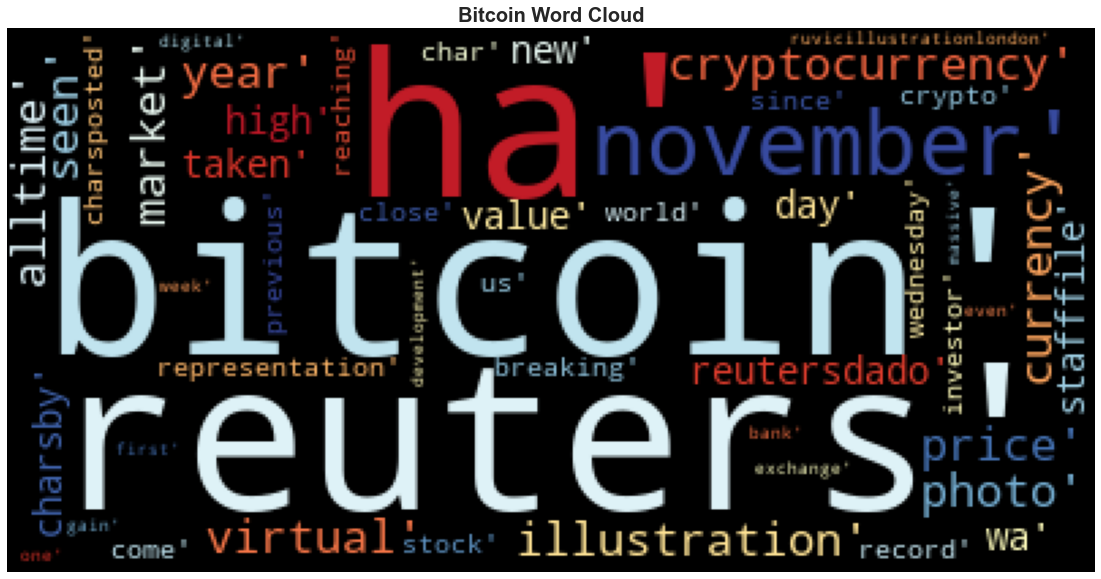

In [77]:
# Create the word cloud
BTC_top_50_words = dict(Counter(BTC_corpus).most_common(50))
BTC_top_50_words_df = pd.DataFrame(list(BTC_top_50_words.items()), columns=['word', 'count'])
terms_list = str(BTC_top_50_words_df["word"].tolist())
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

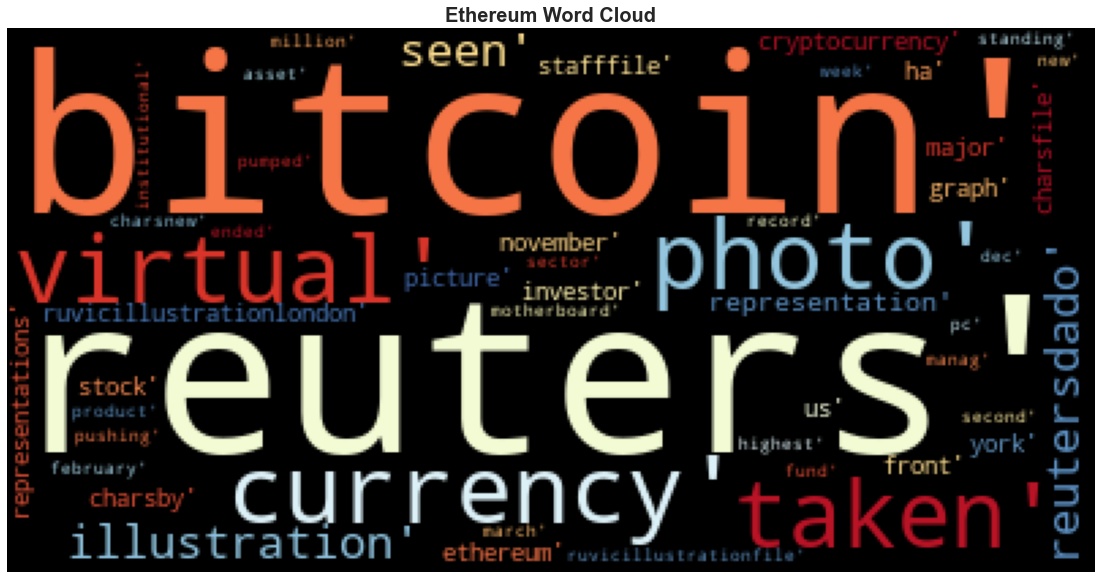

In [36]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
ETC_top_50_words = dict(Counter(ETC_corpus).most_common(50))
ETC_top_50_words_df = pd.DataFrame(list(ETC_top_50_words.items()), columns=['word', 'count'])
terms_list = str(ETC_top_50_words_df["word"].tolist())
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [40]:
import spacy
from spacy import displacy

In [39]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [41]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')


## Bitcoin NER

In [48]:
BTC_df.sort_values(by=['date'], ascending=False, inplace = True)
BTC_df

,date,text,compound,positive,negative,neutral,tokens
3,2020-12-17,Everything is dumb until it works.\r\nAs 2020 ...,0.2732,0.136,0.083,0.781,"[everything, dumb, worksas, come, close, crypt..."
17,2020-12-17,Posted \r\nComprehensive Wealth Management pre...,0.6369,0.148,0.000,0.852,"[posted, comprehensive, wealth, management, pr..."
7,2020-12-17,image copyrightGetty Images\r\nBitcoin has hit...,0.0258,0.076,0.073,0.850,"[image, copyrightgetty, imagesbitcoin, ha, hit..."
1,2020-12-16,After reaching a previous all-time high on Nov...,0.6486,0.174,0.000,0.826,"[reaching, previous, alltime, high, november, ..."
2,2020-12-16,Its been almost three years to the day since t...,0.4019,0.072,0.000,0.928,"[almost, three, year, day, since, price, bitco..."
14,2020-12-16,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.000,1.000,"[reuters, stafffile, photo, representations, b..."
13,2020-12-16,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.000,1.000,"[reuters, stafffile, photo, representation, vi..."
12,2020-12-16,6 with 6 posters participating\r\nThe price of...,0.8016,0.209,0.000,0.791,"[poster, participatingthe, price, one, bitcoin..."
11,2020-12-15,Illustration by Grayson Blackmon / The Verge\r...,-0.5859,0.000,0.103,0.897,"[illustration, grayson, blackmon, verge, one, ..."
8,2020-12-09,Six years after the launch of the Mexico-based...,0.0000,0.000,0.000,1.000,"[six, year, launch, mexicobased, crypotcurrenc..."


In [78]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

BTC_raw_articles = []
for i in range(0, len(BTC_df["text"])):
    BTC_raw_articles.append(BTC_df["text"][i])
#BTC_raw_articles[0]

BTC_articles_Str = ' '.join(map(str, BTC_raw_articles)) 
BTC_articles_Str

"Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars] After reaching a previous all-time high on November 30th, 2020 and December 1st, 2020, bitcoin is now trading well above $20,000 and has surpassed its previous peak price.\r\nBitcoins value has rapidly… [+1062 chars] Its been almost three years to the day since the price of Bitcoin was close to breaking the $20,000 ceiling and came crashing down. On Wednesday, the arbitrary milestone of hodlers dreams was finally… [+1273 chars] Everything is dumb until it works.\r\nAs 2020 comes to a close, the cryptocurrency world is experiencing another late-year surge of consumer interest as prices climb in value. Bitcoin is over $23,000 a… [+1705 chars] In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 2

In [64]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
BTC_doc = nlp(BTC_articles_Str)
# Add a title to the document
# YOUR CODE HERE!
BTC_doc.user_data["title"] = "Bitcoin NER"

In [65]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(BTC_doc, style='ent',)

In [59]:
# List all Entities
# YOUR CODE HERE!
for ent in BTC_doc.ents:
    print(ent.text, ent.label_)

Visa ORG
first ORDINAL
Bitcoin GPE
November 30th, 2020 DATE
December 1st DATE
2020 DATE
bitcoin GPE
above $20,000 MONEY
almost three years DATE
the day DATE
Bitcoin GPE
20,000 MONEY
Wednesday DATE
2020 DATE
late-year DATE
Bitcoin GPE
over $23,000 MONEY
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Bitcoin GPE
20,000 MONEY
14,800 MONEY
more than 170% PERCENT
this year DATE
Six years DATE
Mexico GPE
$62 million MONEY
Decentralized GPE
4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Grayson Blackmon / PERSON
the year DATE
the day DATE
Twitter ORG
6 CARDINAL
6 CARDINAL
one CARDINAL
above $20,000 MONEY
Wednesday DATE
a year DATE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reu PERSON
Reuters ORG
Bitcoin GPE
U.S. GPE
January 6, 20

---

## Ethereum NER

In [67]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
ETC_df.sort_values(by=['date'], ascending=False, inplace = True)
ETC_raw_articles = []
for i in range(0, len(ETC_df["text"])):
    ETC_raw_articles.append(ETC_df["text"][i])
#BTC_raw_articles[0]

ETC_articles_Str = ' '.join(map(str, ETC_raw_articles)) 
ETC_articles_Str

"FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars] Bitcoin was once derided by serious investors as a bubble or a Ponzi scheme. But this year, it has become an irresistible investment for many of them.\xa0\r\nJust this Wednesday, bitcoin topped $20,000 fo… [+5208 chars] FILE PHOTO: Representations of virtual currency Bitcoin are seen in this picture illustration taken taken March 13, 2020. REUTER

In [68]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
ETC_doc = nlp(ETC_articles_Str)
# Add a title to the document
# YOUR CODE HERE!
ETC_doc.user_data["title"] = "Ethereum NER"

In [70]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(ETC_doc, style='ent',)

In [71]:
# List all Entities
# YOUR CODE HERE!
for ent in ETC_doc.ents:
    print(ent.text, ent.label_)

February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
Bitcoin GPE
this year DATE
Wednesday DATE
bitcoin GPE
20,000 MONEY
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
NEW YORK GPE
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
PayPal PERSON
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
The New York Times ORG
Coinbase ORG
December DATE
15 DATE
2020 DATE
6 min QUANTITY
A few days ago DATE
US GPE
Cynthia Lummis PERSON
Bitcoin GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
Novemb